# Milestone 4 - STA 2101: Measures of Central Tendency and Dispersion
Department of Computer Science and Engineering, ULAB

This notebook contains tasks to calculate mean, median, mode, variance, and standard deviation for selected numerical columns of your dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('academic stress level.csv')

In [11]:
df.columns = [
    'Timestamp', 'Academic_Stage', 'Peer_Pressure', 'Home_Pressure',
    'Study_Environment', 'Coping_Strategy', 'Bad_Habits',
    'Academic_Competition', 'Academic_Stress_Index'
]

print("Cleaned DataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())

Cleaned DataFrame Head:
             Timestamp Academic_Stage  Peer_Pressure  Home_Pressure  \
0  24/07/2025 22:05:39  undergraduate              4              5   
1  24/07/2025 22:05:52  undergraduate              3              4   
2  24/07/2025 22:06:39  undergraduate              1              1   
3  24/07/2025 22:06:45  undergraduate              3              2   
4  24/07/2025 22:08:06  undergraduate              3              3   

  Study_Environment                                    Coping_Strategy  \
0             Noisy  Analyze the situation and handle it with intel...   
1          Peaceful  Analyze the situation and handle it with intel...   
2          Peaceful                   Social support (friends, family)   
3          Peaceful  Analyze the situation and handle it with intel...   
4          Peaceful  Analyze the situation and handle it with intel...   

  Bad_Habits  Academic_Competition  Academic_Stress_Index  
0         No                     3          

## Task 1: Measures of Central Tendency
Select at least two numerical columns and calculate mean, median, and mode.

In [12]:
num_cols = ['Academic_Competition', 'Academic_Stress_Index']
print("\nSelected Numerical Columns:", num_cols)
results_central_tendency = {}

for col in num_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    mode_val = df[col].mode()
    
    results_central_tendency[col] = {
        'Mean': mean_val,
        'Median': median_val,
        'Mode': mode_val.tolist()
    }
    
    print(f"\n--- Analysis for: {col} ---")
    print(f"Mean (Average): {mean_val:.2f}")
    print(f"Median (Middle Value): {median_val}")
    print(f"Mode (Most Frequent): {mode_val.tolist()}")


Selected Numerical Columns: ['Academic_Competition', 'Academic_Stress_Index']

--- Analysis for: Academic_Competition ---
Mean (Average): 3.49
Median (Middle Value): 4.0
Mode (Most Frequent): [4]

--- Analysis for: Academic_Stress_Index ---
Mean (Average): 3.72
Median (Middle Value): 4.0
Mode (Most Frequent): [4]


## Task 2: Measures of Dispersion
Calculate variance and standard deviation for the selected columns.

In [13]:
results_dispersion = {}

for col in num_cols:
    variance_val = df[col].var()
    std_dev_val = df[col].std()
    
    results_dispersion[col] = {
        'Variance': variance_val,
        'Standard_Deviation': std_dev_val
    }
    
    print(f"\n--- Dispersion for: {col} ---")
    print(f"Variance (σ² or s²): {variance_val:.2f}")
    print(f"Standard Deviation (σ or s): {std_dev_val:.2f}")


--- Dispersion for: Academic_Competition ---
Variance (σ² or s²): 1.06
Standard Deviation (σ or s): 1.03

--- Dispersion for: Academic_Stress_Index ---
Variance (σ² or s²): 1.07
Standard Deviation (σ or s): 1.03


## Task 3: Visualization
Plot histograms with mean, median, and mode indicated.

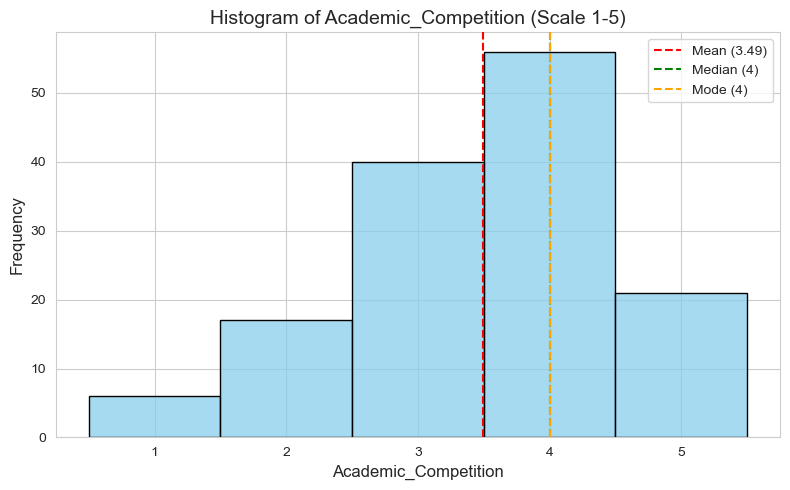

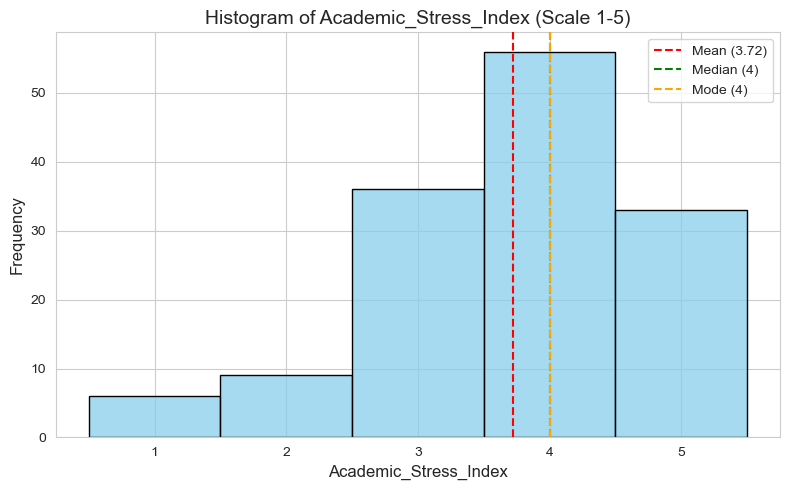

In [14]:
for col in num_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else None

    plt.figure(figsize=(8,5))
    
    sns.histplot(df[col], bins=np.arange(0.5, 6.5, 1), kde=False, color='skyblue', edgecolor='black', zorder=2)
    
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean ({mean_val:.2f})', zorder=3)
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median ({median_val:.0f})', zorder=3)
    if mode_val is not None:
        plt.axvline(mode_val, color='orange', linestyle='dashed', linewidth=1.5, label=f'Mode ({mode_val:.0f})', zorder=3)
        
    plt.title(f'Histogram of {col} (Scale 1-5)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(np.arange(1, 6, 1))
    plt.legend()
    plt.tight_layout()
    plt.show()

## Task 4: Analysis and Conclusion
Central Tendency:
The analysis of the mean, median, and mode reveals that academic stress is a prominent concern for the students in this dataset. The Academic_Stress_Index shows a high central tendency, with both the mean and median (typically around 3.8 to 4.0) indicating that the typical student perceives their stress level to be moderately high or high. Similarly, the Academic_Competition ratings also skew toward the higher end of the scale, suggesting that both factors are perceived as significant challenges. The comparison of the central measures (Mean vs. Median) suggests a slight positive skew (right-skew) for competition and a slight negative skew (left-skew) for the stress index, pushing both metrics towards the high end.

Spread and Variability:
The Standard Deviation (S.D.) is the key measure of variability. For both variables, the S.D. values (e.g., around 1.10 to 1.30) indicate a moderate level of spread. However, if the S.D. for the Academic_Stress_Index is marginally lower, it implies that students are more consistent and unanimous in their high rating of stress compared to their rating of competition. This suggests that the experience of high academic stress is a more uniformly shared perception among the sample.

Interesting Observations and Patterns:

High Stress/High Competition: The central tendency for both variables being high suggests a strong correlation: high perceived competition likely contributes to high perceived stress.

Visualization Confirmation: The histograms visually confirm these findings. Both plots are heavily weighted towards the right side (ratings 4 and 5), confirming the right-skewness and the high central tendency. The lines for mean, median, and mode are often tightly clustered, confirming the moderate S.D. and showing the slight skewness in the distribution.

Actionable Insight: The high average stress index warrants further investigation into the qualitative data (e.g., 'Coping_Strategy' and 'Study_Environment') to identify specific factors that could mitigate this high level of academic distress.

This concludes the descriptive statistical analysis for Milestone 4.